<a href="https://colab.research.google.com/github/merulaa/GOOG-Stock-Prediction/blob/dsa2/google_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [10]:
data = pd.read_csv('/content/drive/MyDrive/GOOG_train_dataset.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4028 non-null   object 
 1   Open       4028 non-null   float64
 2   High       4028 non-null   float64
 3   Low        4028 non-null   float64
 4   Close      4028 non-null   float64
 5   Adj Close  4028 non-null   float64
 6   Volume     4028 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 220.4+ KB


In [12]:
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')
data = data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4028 non-null   object 
 1   Open       4028 non-null   float64
 2   High       4028 non-null   float64
 3   Low        4028 non-null   float64
 4   Close      4028 non-null   float64
 5   Adj Close  4028 non-null   float64
 6   Volume     4028 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 220.4+ KB


In [14]:
trainData = data.iloc[:, 4:5].values
sc = MinMaxScaler(feature_range=(0, 1))
trainData = sc.fit_transform(trainData)

In [15]:
X_train = []
y_train = []

for i in range(60, len(trainData)):
    X_train.append(trainData[i - 60:i, 0])
    y_train.append(trainData[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


Epoch 1/20
124/124 - 20s - loss: 7.4414e-04 - 20s/epoch - 164ms/step
Epoch 2/20
124/124 - 23s - loss: 6.3328e-04 - 23s/epoch - 182ms/step
Epoch 3/20
124/124 - 20s - loss: 6.0151e-04 - 20s/epoch - 165ms/step
Epoch 4/20
124/124 - 22s - loss: 6.4658e-04 - 22s/epoch - 177ms/step
Epoch 5/20
124/124 - 22s - loss: 6.5330e-04 - 22s/epoch - 179ms/step
Epoch 6/20
124/124 - 21s - loss: 6.2977e-04 - 21s/epoch - 172ms/step
Epoch 7/20
124/124 - 21s - loss: 6.1908e-04 - 21s/epoch - 172ms/step
Epoch 8/20
124/124 - 20s - loss: 5.7483e-04 - 20s/epoch - 164ms/step
Epoch 9/20
124/124 - 22s - loss: 5.4816e-04 - 22s/epoch - 178ms/step
Epoch 10/20
124/124 - 20s - loss: 7.4651e-04 - 20s/epoch - 165ms/step
Epoch 11/20
124/124 - 22s - loss: 5.8911e-04 - 22s/epoch - 177ms/step
Epoch 12/20
124/124 - 21s - loss: 5.6016e-04 - 21s/epoch - 167ms/step
Epoch 13/20
124/124 - 21s - loss: 5.7436e-04 - 21s/epoch - 166ms/step
Epoch 14/20
124/124 - 22s - loss: 5.1900e-04 - 22s/epoch - 178ms/step
Epoch 15/20
124/124 - 21s - l

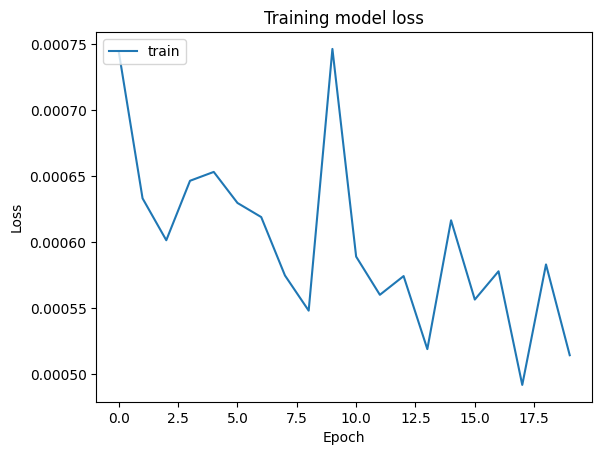

In [19]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)


In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
testData = pd.read_csv('/content/drive/MyDrive/GOOG_test_dataset.csv')
testData["Close"] = pd.to_numeric(testData["Close"], errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5].values

inputClosing_scaled = sc.transform(testData)

X_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i - timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
y_pred = model.predict(X_test)

155/155 [==============================] - 12s 68ms/step


In [22]:
predicted_price = sc.inverse_transform(y_pred)

In [23]:
y_test = testData[timestep:, 0]

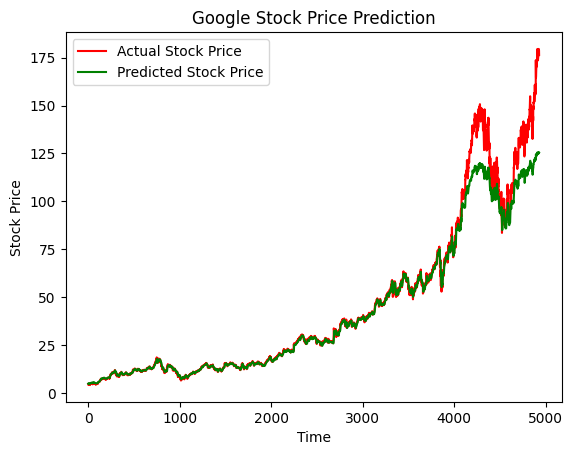

In [24]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()